<Axes: >

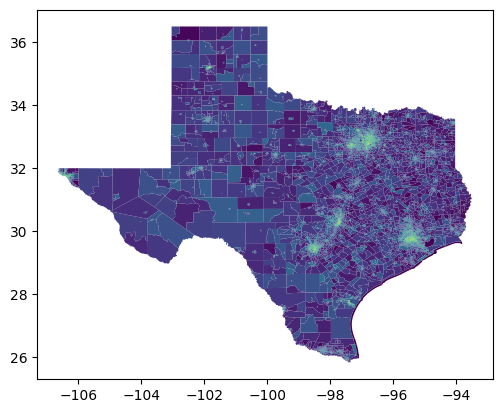

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely import wkt

df = pd.read_csv("walkability_tx.csv")

df['geometry'] = df['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, crs='EPSG:3081')

gdf.plot(column='NatWalkInd')

(9.081609849683828, 3.894119037865466)

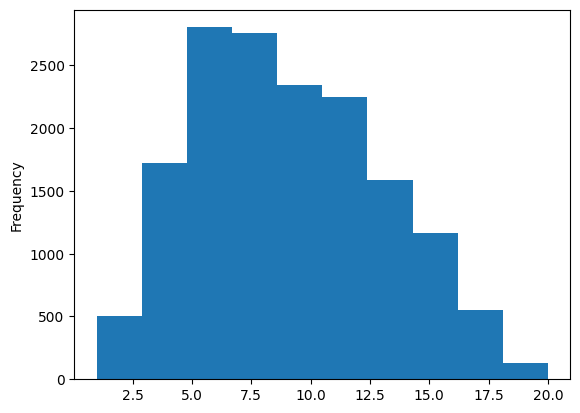

In [ ]:
df['NatWalkInd'].plot.hist()
df['NatWalkInd'].mean(), df['NatWalkInd'].std()

In [ ]:
#df.plot.scatter(x="R_HiWageWk", y="NatWalkInd")
# gdf.plot(column= "R_HiWageWk", legend = True, cmap='OrRd', figsize = (12,12))

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# features = ["D5DRI", "D5DEI", "D5DR", "D5DE", "D4A", "D5BE", "D4D", "D4C", "D4E", "D3A"]
features = ["Ac_Unpr", "CountHU", "P_WrkAge",
            "Pct_AO0",
            "R_LowWageWk", "R_MedWageWk", "R_HiWageWk",
            "E_LowWageWk", "E_MedWageWk", "E_HiWageWk",
            "D1A", "D1C", "D1D"] #"D1B", "Pct_AO1", "Pct_AO2p", "TotPop",

pipeline = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor(n_estimators=200)
)

scores = cross_validate(
    pipeline,
    X=df[features],
    y=df["NatWalkInd"],
    scoring="neg_root_mean_squared_error",
    cv=5,
    verbose=3,
    return_train_score=True)

-scores['test_score'].mean()

[CV] END ................., score=(train=-2.083, test=-2.429) total time=  10.6s
[CV] END ................., score=(train=-2.110, test=-2.283) total time=   9.7s
[CV] END ................., score=(train=-2.135, test=-2.239) total time=  10.4s
[CV] END ................., score=(train=-2.133, test=-2.243) total time=  10.5s
[CV] END ................., score=(train=-2.108, test=-2.326) total time=  10.5s


2.3040130549798454

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.0 MB/s eta 0:00:00


PermutationExplainer explainer: 15812it [32:56,  7.98it/s]


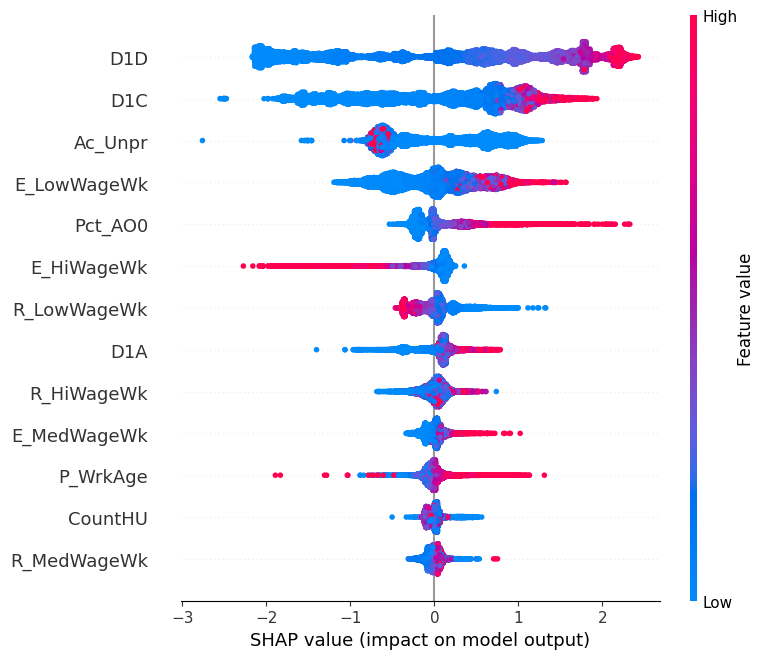

In [ ]:
import shap
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler
    ('gb_reg', GradientBoostingRegressor())  # GradientBoostedRegressor
])

# Train pipeline
pipeline.fit(df[features], df['NatWalkInd'])

# Create SHAP explainer
explainer = shap.Explainer(pipeline.predict, df[features])

# Calculate SHAP values
shap_values = explainer(df[features])

# Visualize SHAP values (optional)
shap.summary_plot(shap_values, df[features])